In [1]:
#Edgar Moises Hernandez-Gonzalez
#07/07/19-16/12/19
#Clasificar habla imaginada en EGG con CNN de 2 capas

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
datos = pd.read_csv("Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072]
y = datos.iloc[:, 3072]

In [3]:
print(x.shape)
print(y.shape)

(132, 3072)
(132,)


In [4]:
n_samples = len(y)
print("n_samples:", n_samples)

n_samples: 132


In [7]:
n_classes = len(np.unique(y))
print("n_classes:", n_classes)

n_classes: 6


In [8]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
x = StandardScaler().fit_transform(x)

In [9]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 6, 512, 1))
print(x.shape)

(132, 6, 512, 1)


In [10]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [35]:
model = Sequential()
model.add(Conv2D(32, (1, 7), activation='relu', input_shape=(6, 512, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (1, 7), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 6, 506, 32)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 253, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 247, 64)        14400     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 123, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7872)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                251936    
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
__________

In [38]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/20
99/99 [==============================] - 0s 3ms/sample - loss: 1.8967 - acc: 0.1616 - val_loss: 1.8022 - val_acc: 0.1212
Epoch 2/20
99/99 [==============================] - 0s 555us/sample - loss: 1.6958 - acc: 0.2828 - val_loss: 1.8050 - val_acc: 0.1818
Epoch 3/20
99/99 [==============================] - 0s 547us/sample - loss: 1.7016 - acc: 0.2626 - val_loss: 1.7946 - val_acc: 0.2727
Epoch 4/20
99/99 [==============================] - 0s 564us/sample - loss: 1.5445 - acc: 0.4343 - val_loss: 1.8204 - val_acc: 0.1515
Epoch 5/20
99/99 [==============================] - 0s 542us/sample - loss: 1.4543 - acc: 0.5354 - val_loss: 1.8459 - val_acc: 0.1515
Epoch 6/20
99/99 [==============================] - 0s 536us/sample - loss: 1.3423 - acc: 0.5758 - val_loss: 1.8602 - val_acc: 0.2121
Epoch 7/20
99/99 [==============================] - 0s 523us/sample - loss: 1.2209 - acc: 0.6364 - val_loss: 1.8939 - val_acc: 0.2424
Epoch 8/20
99/99 [==

In [39]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 303us/sample - loss: 3.3508 - acc: 0.2424
Test loss: 3.3508453170458474
Test accuracy: 0.24242425


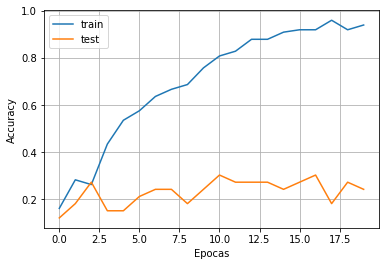

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

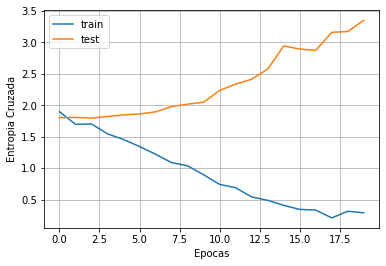

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()